In [1]:
# Importing Required Python Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [2]:
# Reading the final dataset for Feature Selection
bank_df = pd.read_csv('Final_df.csv')

In [3]:
# Getting the info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  float64
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp_var_rate                   41188 non-null  float64
 6   cons_price_idx                 41188 non-null  float64
 7   cons_conf_idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr_employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  contact_telephone              41188 non-null  int64  
 12  month_aug                      41188 non-null 

### Performing Train, Test Split of the dataset.

In [4]:
# Segregating the Feature Space and the Response Variable
y = bank_df['y']
X = bank_df.drop(columns='y')

In [5]:
# Importing the train test split module from Sklearn
from sklearn.model_selection import train_test_split

In [6]:
# Performing Train Test split using sklearn . Here the split is stratified using the class labels
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size =.2,stratify=y)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 25611 to 10747
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            32950 non-null  int64  
 1   duration                       32950 non-null  float64
 2   campaign                       32950 non-null  int64  
 3   pdays                          32950 non-null  int64  
 4   previous                       32950 non-null  int64  
 5   emp_var_rate                   32950 non-null  float64
 6   cons_price_idx                 32950 non-null  float64
 7   cons_conf_idx                  32950 non-null  float64
 8   euribor3m                      32950 non-null  float64
 9   nr_employed                    32950 non-null  float64
 10  contact_telephone              32950 non-null  int64  
 11  month_aug                      32950 non-null  int64  
 12  month_dec                      32950 non-n

## Feature Selection using Mutual Information.

In [8]:
# Loading the numerical columns dataset which contains all the numerical columns & the response variable
num_df = pd.read_csv('Num_df.csv')

In [9]:
# Dropping the Response variable 
num_cols = (num_df.drop(columns='y')).columns

In [10]:
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

In [11]:
# Extracting the Dummy or categorical Columns
cat_cols = list(set(X_train.columns)- set(num_cols))

In [12]:
len(cat_cols)

43

In [13]:
# Normalizing the Numerical columns of X_train before calculating the Mutual Information using KNN algorithm.
from sklearn.preprocessing import MinMaxScaler 

In [14]:
scale = MinMaxScaler()
X_train_norm = scale.fit_transform(X_train[num_cols])

In [17]:
# Converting the numpy array to dataframe. V-IMP: Make sure to put back the original row labels,otherwise new 
# range_index begining from 0 is assigned to new df: Num_df_scaled
Num_df_scaled = pd.DataFrame(X_train_norm,columns=num_cols,index=X_train.index)

In [18]:
Num_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 25611 to 10747
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32950 non-null  float64
 1   duration        32950 non-null  float64
 2   campaign        32950 non-null  float64
 3   pdays           32950 non-null  float64
 4   previous        32950 non-null  float64
 5   emp_var_rate    32950 non-null  float64
 6   cons_price_idx  32950 non-null  float64
 7   cons_conf_idx   32950 non-null  float64
 8   euribor3m       32950 non-null  float64
 9   nr_employed     32950 non-null  float64
dtypes: float64(10)
memory usage: 2.8 MB


In [19]:
X_train[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 25611 to 10747
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   education_university_degree    32950 non-null  int64
 1   job_management                 32950 non-null  int64
 2   day_of_week_thu                32950 non-null  int64
 3   education_basic_6y             32950 non-null  int64
 4   month_mar                      32950 non-null  int64
 5   education_illiterate           32950 non-null  int64
 6   job_self-employed              32950 non-null  int64
 7   month_nov                      32950 non-null  int64
 8   job_blue-collar                32950 non-null  int64
 9   job_housemaid                  32950 non-null  int64
 10  job_technician                 32950 non-null  int64
 11  month_jun                      32950 non-null  int64
 12  loan_yes                       32950 non-null  int64
 13  day_of_week_

In [20]:
# Concatenating Scaled Numerical columns with the categorical columns of X_train
X_train_scaled = pd.concat([Num_df_scaled,X_train[cat_cols]],axis=1)

In [21]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 25611 to 10747
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            32950 non-null  float64
 1   duration                       32950 non-null  float64
 2   campaign                       32950 non-null  float64
 3   pdays                          32950 non-null  float64
 4   previous                       32950 non-null  float64
 5   emp_var_rate                   32950 non-null  float64
 6   cons_price_idx                 32950 non-null  float64
 7   cons_conf_idx                  32950 non-null  float64
 8   euribor3m                      32950 non-null  float64
 9   nr_employed                    32950 non-null  float64
 10  education_university_degree    32950 non-null  int64  
 11  job_management                 32950 non-null  int64  
 12  day_of_week_thu                32950 non-n

In [30]:
# Importing Mutual Information classifier ferom sklearn
from sklearn.feature_selection import mutual_info_classif

In [31]:
# Computing Mutual info. between feature space and Response variable.
MI_X_train_y_train = mutual_info_classif(X_train_scaled,y_train,random_state=42)

In [32]:
# converting Mutual Info. values to corresponding Series.
MI = pd.Series(MI_X_train_y_train,index=X_train_scaled.columns)

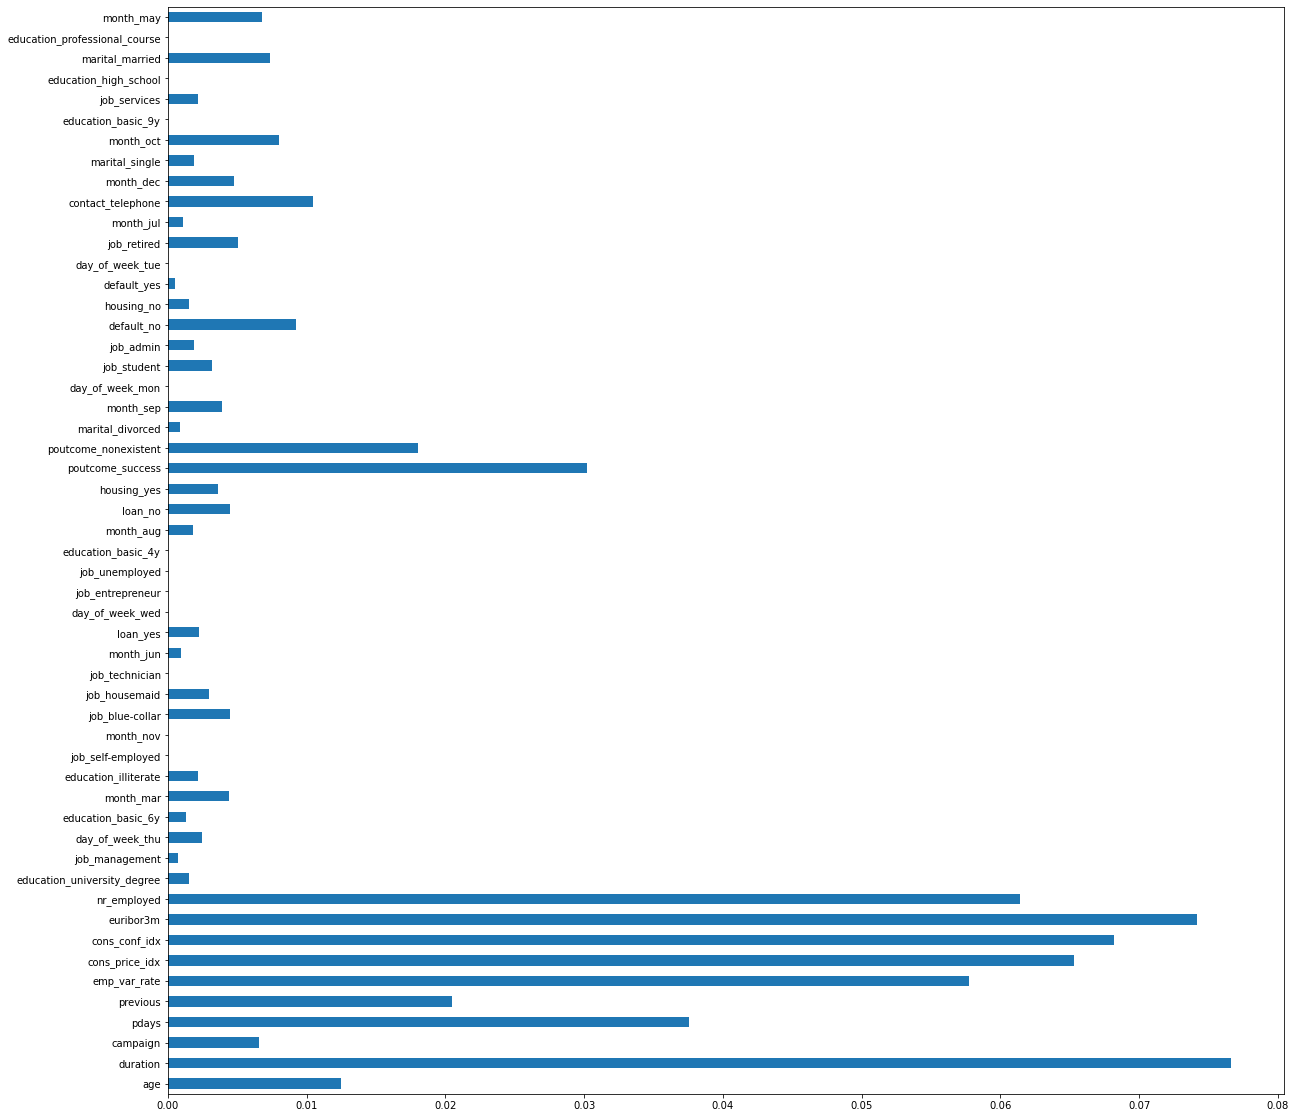

In [33]:
# Plotting the Mutual information corresponding to various features on the horizontal barplot.
fig = plt.figure(figsize=(20,20))
MI.plot.barh()
plt.show()

In [35]:
sum((MI>.001))

37

In [36]:
# Selecting only features having MI >= .001.
X_train_red = X_train[(MI.loc[MI >= .001]).index]

In [37]:
# getting the info of the reduced dataset
X_train_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 25611 to 10747
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          32950 non-null  int64  
 1   duration                     32950 non-null  float64
 2   campaign                     32950 non-null  int64  
 3   pdays                        32950 non-null  int64  
 4   previous                     32950 non-null  int64  
 5   emp_var_rate                 32950 non-null  float64
 6   cons_price_idx               32950 non-null  float64
 7   cons_conf_idx                32950 non-null  float64
 8   euribor3m                    32950 non-null  float64
 9   nr_employed                  32950 non-null  float64
 10  education_university_degree  32950 non-null  int64  
 11  day_of_week_thu              32950 non-null  int64  
 12  education_basic_6y           32950 non-null  int64  
 13  month_mar   

In [38]:
# Removing the corresponding features having MI less than .001 from the test set
X_test_red = X_test[(MI.loc[MI>=.001]).index]

In [39]:
X_test_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8238 entries, 14455 to 33395
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          8238 non-null   int64  
 1   duration                     8238 non-null   float64
 2   campaign                     8238 non-null   int64  
 3   pdays                        8238 non-null   int64  
 4   previous                     8238 non-null   int64  
 5   emp_var_rate                 8238 non-null   float64
 6   cons_price_idx               8238 non-null   float64
 7   cons_conf_idx                8238 non-null   float64
 8   euribor3m                    8238 non-null   float64
 9   nr_employed                  8238 non-null   float64
 10  education_university_degree  8238 non-null   int64  
 11  day_of_week_thu              8238 non-null   int64  
 12  education_basic_6y           8238 non-null   int64  
 13  month_mar    

## Standardizing the numerical columns of the Feature space

In [40]:
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

In [41]:
len(num_cols)

10

In [42]:
# Getting the numerical columns from the reduced training set
num_cols_r = list(set(num_cols).intersection(set(X_train_red.columns)))

In [43]:
num_cols_r

['pdays',
 'campaign',
 'previous',
 'cons_price_idx',
 'emp_var_rate',
 'cons_conf_idx',
 'nr_employed',
 'age',
 'euribor3m',
 'duration']

In [44]:
len(num_cols_r)

10

### From the above output we can clearly see that all the numerical columns are present in the reduced training set. 

In [45]:
# Getting the Categorical columns of the reduced training set
cat_cols_r = list(set(X_train_red.columns) - set(num_cols_r))

In [46]:
len(cat_cols_r)

27

In [47]:
# Importing the Standard scaler from Sklearn
from sklearn.preprocessing import StandardScaler

In [48]:
# Instantiating the Standard Scaler object & fit_transforming the Training set.
st_scaler = StandardScaler()
arr = st_scaler.fit_transform(X_train_red[num_cols_r])

In [49]:
# Converting the array to the corresponding dataframe
Num_df_scaled = pd.DataFrame(arr,columns=num_cols_r,index=X_train_red.index)

In [50]:
Num_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 25611 to 10747
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pdays           32950 non-null  float64
 1   campaign        32950 non-null  float64
 2   previous        32950 non-null  float64
 3   cons_price_idx  32950 non-null  float64
 4   emp_var_rate    32950 non-null  float64
 5   cons_conf_idx   32950 non-null  float64
 6   nr_employed     32950 non-null  float64
 7   age             32950 non-null  float64
 8   euribor3m       32950 non-null  float64
 9   duration        32950 non-null  float64
dtypes: float64(10)
memory usage: 2.8 MB


In [52]:
# Concatenating the Numerical columns with Categorical columns of Training Data
X_train_red_st = pd.concat([Num_df_scaled,X_train_red[cat_cols_r]],axis=1)

In [53]:
X_train_red_st.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 25611 to 10747
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pdays                        32950 non-null  float64
 1   campaign                     32950 non-null  float64
 2   previous                     32950 non-null  float64
 3   cons_price_idx               32950 non-null  float64
 4   emp_var_rate                 32950 non-null  float64
 5   cons_conf_idx                32950 non-null  float64
 6   nr_employed                  32950 non-null  float64
 7   age                          32950 non-null  float64
 8   euribor3m                    32950 non-null  float64
 9   duration                     32950 non-null  float64
 10  education_university_degree  32950 non-null  int64  
 11  education_illiterate         32950 non-null  int64  
 12  education_basic_6y           32950 non-null  int64  
 13  month_mar   

### Standardizing the numerical columns of the test data

In [54]:
# Transforming the Numerical columns of the test set with the same standard scaler object as was used to fit Training set
arr1 = st_scaler.transform(X_test_red[num_cols_r])

In [55]:
# Converting the array to the corresponding dataframe 
Num_df_scaled = pd.DataFrame(arr1,columns=num_cols_r,index=X_test_red.index)

In [56]:
Num_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8238 entries, 14455 to 33395
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pdays           8238 non-null   float64
 1   campaign        8238 non-null   float64
 2   previous        8238 non-null   float64
 3   cons_price_idx  8238 non-null   float64
 4   emp_var_rate    8238 non-null   float64
 5   cons_conf_idx   8238 non-null   float64
 6   nr_employed     8238 non-null   float64
 7   age             8238 non-null   float64
 8   euribor3m       8238 non-null   float64
 9   duration        8238 non-null   float64
dtypes: float64(10)
memory usage: 708.0 KB


In [57]:
# Concatenating the Numerical columns with Categorical columns of Test Data
X_test_red_st = pd.concat([Num_df_scaled,X_test_red[cat_cols_r]],axis=1)

In [58]:
X_test_red_st.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8238 entries, 14455 to 33395
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pdays                        8238 non-null   float64
 1   campaign                     8238 non-null   float64
 2   previous                     8238 non-null   float64
 3   cons_price_idx               8238 non-null   float64
 4   emp_var_rate                 8238 non-null   float64
 5   cons_conf_idx                8238 non-null   float64
 6   nr_employed                  8238 non-null   float64
 7   age                          8238 non-null   float64
 8   euribor3m                    8238 non-null   float64
 9   duration                     8238 non-null   float64
 10  education_university_degree  8238 non-null   int64  
 11  education_illiterate         8238 non-null   int64  
 12  education_basic_6y           8238 non-null   int64  
 13  month_mar    

In [59]:
# Saving the Reduced Training set as a CSV File
X_train_red_st.to_csv('X_train_final.csv',index=False)

In [60]:
# Saving the Reduced Test set as a CSV File
X_test_red_st.to_csv('X_test_final.csv',index=False)

In [61]:
# Saving the training labels set as a CSV File
y_train.to_csv('y_train.final.csv',index=False)

In [62]:
# Saving the test labels set as a CSV File
y_test.to_csv('y_test.final.csv',index=False)

## Creating Full Feature Standardized X_train and X_test with 

In [68]:
# Loading the numerical columns dataset
num_df = pd.read_csv('Num_df.csv')

In [69]:
# Dropping the Response variable & extracting columns
num_cols = (num_df.drop(columns='y')).columns

In [70]:
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

In [71]:
len(num_cols)

10

In [72]:
# Extracting the Dummy Columns
cat_cols = list(set(X_train.columns)- set(num_cols))

In [73]:
len(cat_cols)

43

In [74]:
# Making use of Standard scaler to fit transform Numerical columns of full X_train
st_scaler = StandardScaler()
arr = st_scaler.fit_transform(X_train[num_cols])

In [75]:
# Converting transformed array arr to Dataframe
df_scaled = pd.DataFrame(arr,columns=num_cols,index=X_train.index)

In [76]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 25611 to 10747
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32950 non-null  float64
 1   duration        32950 non-null  float64
 2   campaign        32950 non-null  float64
 3   pdays           32950 non-null  float64
 4   previous        32950 non-null  float64
 5   emp_var_rate    32950 non-null  float64
 6   cons_price_idx  32950 non-null  float64
 7   cons_conf_idx   32950 non-null  float64
 8   euribor3m       32950 non-null  float64
 9   nr_employed     32950 non-null  float64
dtypes: float64(10)
memory usage: 2.8 MB


In [79]:
# Combining the scaled numerical columns of the X_train with Categorical columns
X_train_full = pd.concat([df_scaled,X_train[cat_cols]],axis=1)

In [82]:
# Standardizing the numerical columns of X_test
arr_test = st_scaler.transform(X_test[num_cols])

In [83]:
# Converting transformed array arr_test to Dataframe
df_scaled_test = pd.DataFrame(arr_test,columns=num_cols,index=X_test.index)

In [86]:
# Combining the scaled numerical columns of the X_test with Categorical columns
X_test_full = pd.concat([df_scaled_test,X_test[cat_cols]],axis=1)

In [90]:
# Saving the Full Training Feature set as a CSV File
X_train_full.to_csv('X_train_full_final.csv',index=False)

In [91]:
# Saving the Full Test Feature set as a CSV File
X_test_full.to_csv('X_test_full_final.csv',index=False)